In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
x_values=np.linspace(-6, 6, 200)
y_values=1/(1+np.exp(-1*x_values))

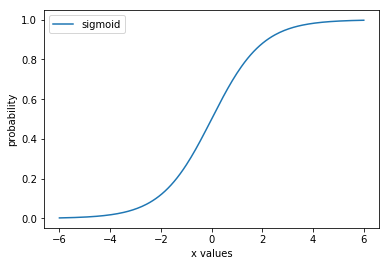

In [12]:
plt.plot(x_values, y_values, label='sigmoid')
plt.legend()
plt.ylabel('probability')
plt.xlabel('x values')
plt.show()

In [18]:
f_x=0.5-2-12+12

probability=1-1/(1+np.exp(-1*f_x))
print("Probability: {:.1f}%".format(probability*100))

Probability: 81.8%


In [20]:
from sklearn import datasets

iris=datasets.load_iris()

print('Type:', type(iris)) # sklearn.utils.Bunch

Type: <class 'sklearn.utils.Bunch'>


In [21]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [25]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [26]:
pd.value_counts(iris['target'])

2    50
1    50
0    50
dtype: int64

In [46]:
y = (iris['target'] == 0).astype(int)

In [51]:
X = iris['data'] # Get matrix with all features
X = X[:, [2, 3]]

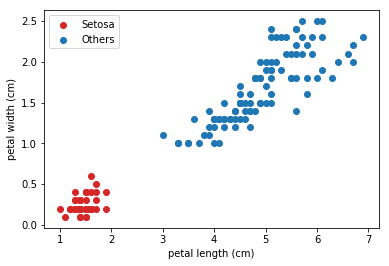

In [52]:
setosa_idx=(y == 1)

plt.scatter(X[:,0][setosa_idx], X[:,1][setosa_idx], label='Setosa', color='C3')
plt.scatter(X[:,0][~setosa_idx], X[:,1][~setosa_idx], label='Others', color='C0')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.legend()
plt.show()

In [54]:
from sklearn.model_selection import train_test_split

X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.3, random_state=0)

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

logreg=make_pipeline(StandardScaler(), LogisticRegression(solver='liblinear'))

logreg.fit(X_tr, y_tr)

logreg.score(X_te, y_te)

1.0

In [67]:
# New flower
new_flower = [
    1.5, # petal length (cm)
    0.3, # petal width (cm)
]

# Classify it
logreg.predict([new_flower])
# Returns: array([1])




array([1])

In [68]:
# Get probabilities
logreg.predict_proba([new_flower])

array([[0.05238258, 0.94761742]])

In [69]:
# Helper function
def decision_surface(ax, X, y, logreg):
    # Plot data points
    setosa_idx = (y == 1) # Setosa data points

    plt.scatter(X[:, 0][setosa_idx], X[:, 1][setosa_idx],
        color='C3', label='setosa') # Setosa
    plt.scatter(X[:, 0][~setosa_idx], X[:, 1][~setosa_idx],
        color='C0', label='other') # Versicolor and virginica

    # Create a grid of values
    xlim, ylim = ax.get_xlim(), ax.get_ylim()
    x_values = np.linspace(*xlim, num=40)
    y_values = np.linspace(*ylim, num=40)
    xx, yy = np.meshgrid(x_values, y_values)
    points = np.c_[xx.flatten(), yy.flatten()]

    # Probability for positive class (setosa)
    probs = logreg.predict_proba(points)
    prob_setosa = probs[:, 1]

    # Draw decision boundary (p=0.5)
    zz = prob_setosa.reshape(xx.shape)
    plt.contour(xx, yy, zz, levels=[0.5], colors='gray')

    # Plot decision surface with level curves
    plt.contourf(xx, yy, zz, 10, alpha=0.3, cmap=plt.cm.coolwarm)

    # Add labels
    plt.xlabel('petal length (cm)')
    plt.ylabel('petal width (cm)')
    plt.legend()
    plt.colorbar(label='probability')
    plt.show()



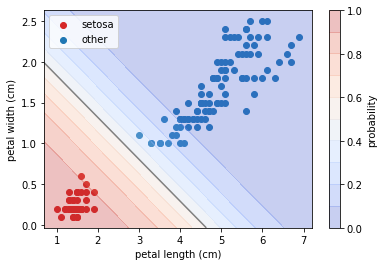

In [72]:
# Plot decision surface
fig = plt.figure()
decision_surface(fig.gca(), X, y, logreg)
